## Laboratories 7-8-9

# Robot arm process dynamic modeling 

### 7.1 Euler-Lagrange equations

The Lagrangian is defined as

\begin{equation}
L=K-P \text{ (1)}
\end{equation}
where $K$ represents the total kinetic energy of the system and $P$ represents the total potential energy of the system. 
The Euler-Lagrange equations that describe the dynamics of a $n-DOF$ mechanical system are:

\begin{equation}
\frac{d}{dt}\frac{\partial L}{\partial \dot{q}_i}-\frac{\partial L}{\partial q_i}=\tau_i, \qquad i=1,...,n, \text{ (2)}
\end{equation}

where $q_i$ represent generalized coordinates (in our case the joint angles) and $\tau_i$ generalized forces (in our case motor torques)


The matrix form of the Euler-Lagrange equations is:

\begin{equation}\label{robmodel}
D(q)\ddot{q}+C(q,\dot{q})\dot{q}+G(q)=\tau  \text{ (3)}
\end{equation}

where $q=[q_1,...,q_n]^T, \tau=[\tau_1,...,\tau_n]^T$. 


The matrix $D(q)$ is called inertia matrix, it is symmetric and positive definite, and can be expressed in terms of the kinetic energy:
\begin{equation}
K=\frac{1}{2} \dot{q}^T D(q) \dot{q}=\frac{1}{2}\sum_{i,j}^{n} d_{i,j}(q)\dot{q}_i\dot{q}_j.  \text{ (4)}
\end{equation}

The matrix $C(q)$ takes into account centrifugal and Coriolis terms, and each $k,j-th$ matrix element can be calculated as:

\begin{equation}\label{cterms}
c_{kj}=\frac{1}{2}\sum_{i=1}^{n} 
\bigg \{
\underbrace{
\frac{\partial d_{kj}}{\partial q_i}+\frac{\partial d_{ki}}{\partial q_j}-\frac{\partial d_{ij}}{\partial q_k}
}_{c_{ijk}}
\bigg \}
\dot{q}_i.  \text{ (5)}
\end{equation}

The last term $G(q)$, sometimes called gravity term, is a column vector $G=[g_1...g_n]^T$, where each $k-th$ term is derived from the potential energy:

\begin{equation}\label{grav}
g_k(q)=\frac{\partial P}{\partial q_k },  \qquad k=1,...,n.  \text{ (6)}
\end{equation}

### 7.2 A 2DOF robot arm with spatial movement

Consider a 2DOF robot arm with two revolute joints, that can move in a 3D Cartesian space, with the schematic representation from Figure 7.1. Because the first rotation axis is on the X axis, and the second on the Y axis, that robot can move in a 3D space.

<center>
    <figure class="image">
      <img src="artwork/DynMod/2DOF.png" width=40% />
      <figcaption>Figure 7.1: Schematic representation of a 2DOF robot arm </figcaption>
    </figure>
</center>

#### 7.2.1 Geometric Model

The geometric model can be derived through transformation matrices from the base frame to the end effector frame. The base frame coincides with the first frame (that is the frame of joint 1, with origin $O_1$ in the center of the joint). Thus the transformation matrix $T_{01}$ is simply a rotation around X: 

\begin{equation}
T_{01}=Rot(x,q_1)=\begin{bmatrix}
 1 &       0 &        0 & 0\\
 0 & cos(q_1) & -sin(q_1) & 0\\
 0 & sin(q_1) &  cos(q_1) & 0\\
 0 &       0 &        0 & 1
\end{bmatrix}\  \text{ (7)}
\end{equation}

From Frame 1 we arrive at Frame 2 (corresponding to the joint 2) through a translation on Z and a rotation around Y ($T_{12}$):

\begin{equation}
T_{12}=Transl(z,L_1) \cdot  Rot(y,q_2)=\begin{bmatrix}
  cos(q2) & 0 & sin(q2) &  0\\
       0 & 1 &       0 &  0\\
 -sin(q2) & 0 & cos(q2) & L_1\\
 0 &       0 &        0 & 1
\end{bmatrix}\  \text{ (8)}
\end{equation}

Finally, the end effector frame is obtained through a translation on Z ($T_{23}$): 
 
\begin{equation}
T_{23}=Transl(z,L_2)=\begin{bmatrix}
 1 &       0 &        0 & 0\\
 0 & 1 & 0 & 0\\
 0 & 0 &  1	 & L_2\\
 0 &       0 &        0 & 1
\end{bmatrix}\  \text{ (9)}
\end{equation}

The transformation matrix from the based frame to the end effector, that is the geometric model is obtained through multiplication:

\begin{equation}\label{geom}
T=T_{03}=T_{01} \cdot T_{12} \cdot T_{23}= \begin{bmatrix}
          cos(q_2)&       0&          sin(q_2)&                 L_2sin(q_2)\\
  sin(q_1)sin(q_2)& cos(q_1)& -cos(q_2)sin(q_1)& -sin(q_1)(L_1 + L_2cos(q_2))\\
 -cos(q_1)sin(q_2)& sin(q_1)&  cos(q_1)cos(q_2)&  cos(q_1)(L_1 + L_2cos(q_2))\\
                0&       0&                0&                          1
\end{bmatrix}  \text{ (10)}
\end{equation}

The position of the end effector with respect to the joint angles $q_1$ and $q_2$ is given by the first three elements of the 4th column:

\begin{equation}
x=L_2 sin(q_1),
y=-L_1 sin(q_1)-L_2 sin(q_1) cos(q_2),
z= L_1 cos(q_1)+L_2 cos(q_1) cos(q_2)  \text{ (11)}
\end{equation}

The orientation of the end effector is given by the submatrix R (lines 1-3 and columns 1-3 of T):

\begin{equation}
R=
\begin{bmatrix}
          cos(q_2)&       0&          sin(q_2)\\
  sin(q_1)sin(q_2)& cos(q_1)& -cos(q_2)sin(q_1)\\
 -cos(q_1)sin(q_2)& sin(q_1)&  cos(q_1)cos(q_2)
\end{bmatrix}. \text{ (12)}
\end{equation}

#### 7.2.2 Jacobian

The Jacobian relates the joint velocities to the linear and angular velocities of the end effector. For the 2DOF robot arm from Figure 7.1, with the geometric model from equation (10), the Jacobian is:

\begin{equation}
J=
\begin{bmatrix}
        0                                  &       \frac{L_2}{2}cos(q_2)    \\
-\frac{L_2}{2}cos(q_1)cos(q_2)-L_1cos(q_1) &       \frac{L_2}{2}sin(q_1)sin(q_2) \\
-\frac{L_2}{2}sin(q_1)cos(q_2)-L_1sin(q_1) &       -\frac{L_2}{2}cos(q_1)sin(q_2) \\
          1                                &       0 \\       
          0                                &       cos(q_1) \\ 
          0                                &       sin(q_1) 
\end{bmatrix} \text{ (13)}
\end{equation}

Thus, if we refer to link 2, the angular and linear Jacobians are:

\begin{equation}
J_{vc2}=J_{vc}=
\begin{bmatrix}
        0                                  &       \frac{L_2}{2}cos(q_2)    \\
-\frac{L_2}{2}cos(q_1)cos(q_2)-L_1cos(q_1) &       \frac{L_2}{2}sin(q_1)sin(q_2) \\
-\frac{L_2}{2}sin(q_1)cos(q_2)-L_1sin(q_1) &       -\frac{L_2}{2}cos(q_1)sin(q_2)
\end{bmatrix} \text{ (14)}
\end{equation}

\begin{equation}
J_{\omega2}=J_{\omega}=
\begin{bmatrix}
          1                                &       0 \\       
          0                                &       cos(q_1) \\ 
          0                                &       sin(q_1) 
\end{bmatrix}  \text{ (15)}
\end{equation} 

Further on, the angular and linear Jacobians for link 1 can be determined as:

\begin{equation}
J_{vc1}=
\begin{bmatrix}
        0              &       0    \\
-\frac{L_1}{2}cos(q_1) &       0 \\
-\frac{L_1}{2}sin(q_1)  &       0
\end{bmatrix},  \text{ (16)}
\end{equation}

\begin{equation}
J_{\omega1}=
\begin{bmatrix}
          1                                &       0 \\       
          0                                &       0 \\ 
          0                                &       0 
\end{bmatrix}  \text{ (17)}
\end{equation}

#### 7.2.3 Lagrangian

The Lagrangian is composed out of kinetic energy and potential energy.
The kinetic energy has a translational and a rotational component

\begin{equation}
K=K_{transl}+K_{rot}  \text{ (18)}
\end{equation}

given by the expressions:
\begin{equation}
K_{transl}=\frac{1}{2}m_1 v_{c1}^T v_{c1}+\frac{1}{2}m_2 v_{c2}^T v_{c2}=\frac{1}{2} \dot{q}^T (m_1 J_{vc1}^T J_{vc1}+m_2 J_{vc2}^T J_{vc2}) \dot{q}   \text{ (19)}
\end{equation}

and
\begin{equation}
K_{rot}=\frac{1}{2} \dot{q}^T(J_{\omega2}^T R_0^2 I_2 R_0^{2_T} J_{\omega2}+J_{\omega1}^T R_0^1 I_1 R_0^{1_T} J_{\omega1})\dot{q}   \text{ (20)}
\end{equation}

with \begin{equation}
R_0^2=R, \quad R_0^1=T_0^1(1:3,1:3), I_2=diag\{0,I_{2y},0\},\quad I_1=diag\{I_{1x},0,0\}.
\end{equation}

After calculating the expressions for both components of the kinetic energy, we obtain the inertia matrix $D(q)$ as

\begin{equation}
D(q)=\begin{bmatrix}
          d_{11}&    d_{12}\\
          d_{21}&    d_{22}
\end{bmatrix}=\begin{bmatrix}
  I_{1x}+\frac{L_1^2 m_1}{4}+L_1^2m_2+\frac{L_2^2 m_2}{4}cos^2(q_2)+L_1L_2m_2cos(q_2)   &    0\\
     0																					&    \frac{m_2 L_2^2}{4}+I_{2y}
\end{bmatrix}  \text{ (21)}
\end{equation}

In deriving matrix $C(q,\dot{q})$, we first calculate each $c_{ijk}$ term from equation (5):

\begin{equation}
\begin{matrix}
  c_{111}=\frac{\partial d_{11}}{\partial q_1}+\frac{\partial d_{11}}{\partial q_1}-\frac{\partial d_{11}}{\partial q_1}=0   \\
     c_{112}=\frac{\partial d_{21}}{\partial q_1}+\frac{\partial d_{21}}{\partial q_1}-\frac{\partial d_{11}}{\partial q_2}=\frac{L_2^2 m_2}{4}sin(2q_2)+L_1L_2m_2sin(q_2)																			\\
     c_{121}=\frac{\partial d_{12}}{\partial q_1}+\frac{\partial d_{11}}{\partial q_2}-\frac{\partial d_{12}}{\partial q_1}=-\frac{L_2^2 m_2}{4}sin(2q_2)-L_1L_2m_2sin(q_2) \\
     c_{122}=\frac{\partial d_{22}}{\partial q_1}+\frac{\partial d_{21}}{\partial q_2}-\frac{\partial d_{12}}{\partial q_2}=0 \\
     c_{211}=\frac{\partial d_{11}}{\partial q_2}+\frac{\partial d_{12}}{\partial q_1}-\frac{\partial d_{21}}{\partial  q_1}=c_{121} \\
     c_{212}=\frac{\partial d_{21}}{\partial q_2}+\frac{\partial d_{22}}{\partial q_1}-\frac{\partial d_{21}}{\partial q_2}=0 \\
     c_{221}=\frac{\partial d_{12}}{\partial q_2}+\frac{\partial d_{12}}{\partial q_2}-\frac{\partial d_{22}}{\partial q_1}=0 \\
     c_{222}=\frac{\partial d_{22}}{\partial q_2}+\frac{\partial d_{22}}{\partial q_2}-\frac{\partial d_{22}}{\partial q_2}=0
\end{matrix}   \text{ (22)}
\end{equation}

In the end we obtain the matrix:
\begin{equation}
C(q,\dot{q})= \begin{bmatrix} -\frac{L_2^2 m_2}{8}sin(2q_2)\dot{q}_2-\frac{1}{2} L_1L_2m_2sin(q_2)\dot{q}_2  &  -\frac{L_2^2 m_2}{8}sin(2q_2)\dot{q}_1-\frac{1}{2}L_1L_2m_2sin(q_2)\dot{q}_1\\
         \frac{L_2^2 m_2}{8}sin(2q_2)\dot{q}_1+\frac{1}{2}L_1L_2m_2sin(q_2)\dot{q}_1  &  0
\end{bmatrix}  \text{ (23)}
\end{equation}


The potential energy is determined by multiplying the mass by the gravitational acceleration and the height at the center of mass:
\begin{equation}
P_1=m_1g\frac{L_1}{2}cos(q_1), \text{ (24)}\\
P_2=m_2g \Big (L_1cos(q_1)+\frac{L_2}{2}cos(q_1)cos(q_2) \Big),  \text{ (25)}\\  
P=P_1+P_2. 
\end{equation}

Based on equation (6), the gravity term is determined as:
\begin{equation}
G(q)=\begin{bmatrix}
-\frac{m_1gL_1+2m_2gL_1}{2}sin(q_1)-\frac{m_2gL_2}{2}sin(q_1)cos(q_2)\\
-\frac{m_2gL_2}{2}cos(q_1)sin(q_2)
\end{bmatrix} \text{ (26)}
\end{equation}

This completes the dynamic model for our robot arm.

##  7.3 Proposed problems

  1. Consider the robotic structure from Fig 7.2 with only 1 degree of freedom, for which $l=1\;m$, $m=1\;kg$, and $I= \begin{bmatrix} \frac{1}{12} &0 &0 \\ 0 &0 &0\\ 0 &0 &\frac{1}{12}\end{bmatrix}$.
  
  
    a. Compute the equation of motion for the robot based on the Euler-Lagrange formulation.
    b. Implement the robot model in Python using the state space representation and odeint for solving the differential equation. Give the input torque as a sine wave. Interpret the results.
<center>
    <figure class="image">
      <img src="artwork/DynMod/1DOF.png" width=50% />
      <figcaption>Figure 7.2: 1DOF robot </figcaption>
    </figure>
</center>
  

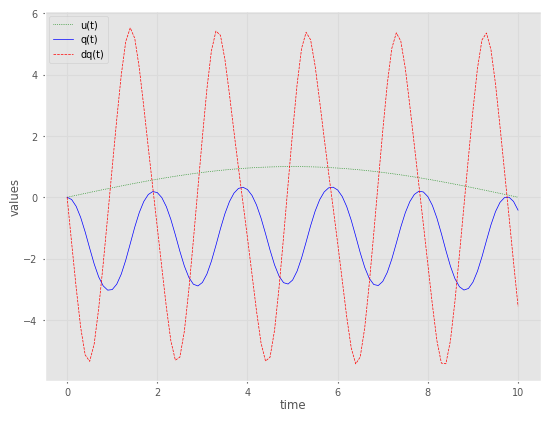

In [7]:
%reset -f
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import roboticstoolbox as rtb
from roboticstoolbox import *
from spatialmath import *
from spatialmath.base import * 
import math as m

#######  1B  ########

# the robot model
def model(x,t,u):
    # gravitational acceleration
    g = 9.98
    
    # states
    q  = x[0]
    dq = x[1]
    
    l = 1
    m = 1
    I = 1/12
    
    xdot1 = x[1]
    xdot2 = (u-m*g*l/2*np.cos(q))/(m*l/4+I)
    xdot  = [xdot1,xdot2]
    
    return xdot

# initial condition of the state variable
x0 = [0,0]

# number of time points
n = 101

# initial and final time (seconds)
t0 = 0
tf = 10

# time points
t = np.linspace(t0,tf,n)

# input
u = np.sin(np.linspace(0,np.pi,n))

# store solution in an array like t
q  = np.empty_like(t)
dq = np.empty_like(t)

# record initial conditions
q[0]  = x0[0]
dq[0] = x0[1]

# solve ODE for each step
for i in range(1,n):
    # span/period for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    x = odeint(model,x0,tspan,args=(u[i],))
    # store solution for plotting
    q[i]  = x[1][0]
    dq[i] = x[1][1]
    # next initial condition
    x0 = x[1]

################ plot results
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,q,'b-',label='q(t)')
plt.plot(t,dq,'r--',label='dq(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

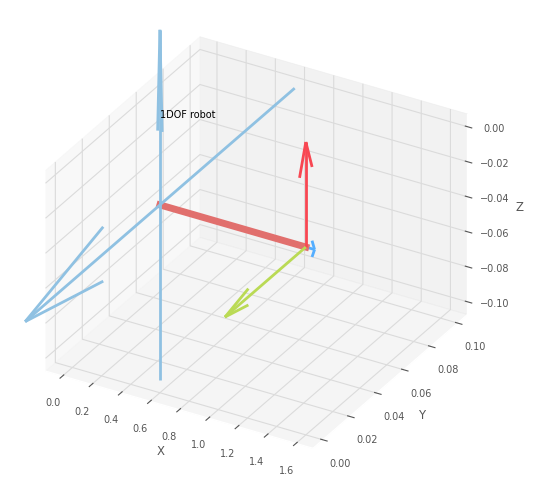

PyPlot3D backend, t = 10.000000000000007, scene:
  1DOF robot

<Figure size 640x480 with 0 Axes>

In [8]:
############### animation 
q = q.reshape(n,1)
l = 1
robot = DHRobot([ RevoluteMDH(alpha=m.pi/2, offset=m.pi/2), RevoluteMDH(d=l, alpha=m.pi/2), ], base=SE3(0.6, 0, 0), name = '1DOF robot')
zers  = np.zeros_like(q)
coord = np.concatenate((q,zers),axis=1)
robot.plot(coord, movie='1dof.gif', dt=tf/n, shadow=False)

  2. Consider the 2DOF robotic structure from Figure 7.3, for which $L1=L2=1 \;m$, $m1=m2=1\;kg$. The q1 and q2 initial conditions are $\pi$/4 and 1.
  

    a. Find the DGM using the D-H convention and create the robot using the robotics toolbox library DHRobot.
    b. Compute the C, D, and G matrices.    
    c. Implement in Python the robot model using the state space representation, with odeintw (wrapper of odeint for working with matrices) for solving the MIMO diferential equations. Give two sine waves as the input joint torques.  
    d. Plot the positions and velocities compared with the inputs. Interpret the results.
   
<center>
    <figure class="image">
      <img src="artwork/DynMod/2DOFstud.png" width=50% />
      <figcaption>Figure 7.3: 2DOF robot </figcaption>
    </figure>
</center>

  3. Take a look at the third cell, containing code on how to do the dynamics with the toolbox applied on the AL5D_mdw. Run it and see its results. 

In [ ]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import roboticstoolbox as rtb
import math as m
from roboticstoolbox import *
from spatialmath import *
from spatialmath.base import * 
from lab_functions import lim_prismatic
from odeintw import *

##########  2C, 2D ############

pr_lim = 10

def model(x,t,u):
    
  
    u = u.reshape(2,1) # reshaping for mathematical operations
    
    q  = x[:,0]  #first column of states x, the positions
    dq = x[:,1]  #second column of states x, the velocities
    lim_prismatic(q,dq,pr_lim)
    
    
    D =     

    C =
 
    G = 
    
    xdot1 = 
    xdot2 = 
    
    xdot = np.concatenate((xdot1, xdot2), axis=1)

    return xdot



In [ ]:
# 3. AL5D toolbox example

import roboticstoolbox as rtb
import numpy as np
import matplotlib.pyplot as plt
from math import pi 

# import the dh model of the Al5d_mdw
rob = rtb.models.DH.AL5D_mdw()
q = np.array([0,0,0,0,0])
qd = q

print(rob.dynamics())

# G, M, C matrices at position and velocity q and qd
G = rob.gravload(q)
M = rob.inertia(q)
C = rob.coriolis(q, qd)

# inputs sent to the model defined in this function
def no_torque_func(rob, t, q, qd):
    return np.zeros((rob.n, ))

tg = rob.fdyn(T=5, q0=q, dt=0.01, torque=no_torque_func)
 
# plotting the joint coordinates    
plt.figure(2)
plt.plot(tg.t, tg.q[:,0], 'b', label='q1')
plt.plot(tg.t, tg.q[:,1], 'r', label='q2')
plt.plot(tg.t, tg.q[:,2], 'g', label='q3')
plt.plot(tg.t, tg.q[:,3], 'm', label='q4')
plt.plot(tg.t, tg.q[:,4], 'y', label='q5')
plt.legend(loc='best')
plt.ylabel('values')
plt.xlabel('time')
plt.grid(True)


# # 3D visualisation of the al5d_mdw
# rob = rtb.models.URDF.AL5D_mdw()
# rob.plot(tg.q)